In [88]:
import tensorflow
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [65]:


health_data =  pd.read_csv('../merged_final_data_clean.csv')

In [66]:
print(health_data.columns)

Index(['TIME', 'PATIENT', 'Age', 'Gender', 'Race', 'Triglycerides',
       'How many family members  including yourself  do you currently live with?',
       'Hemoglobin [Mass/volume] in Blood', 'Body Mass Index',
       'Low Density Lipoprotein Cholesterol', 'Calcium', 'Are you a refugee?',
       'In the past year  have you or any family members you live with been unable to get any of the following when it was really needed?',
       'Total Cholesterol',
       'Stress is when someone feels tense  nervous  anxious or can't sleep at night because their mind is troubled. How stressed are you?',
       'High Density Lipoprotein Cholesterol', 'Carbon Dioxide',
       'Are you worried about losing your housing?',
       'Platelets [#/volume] in Blood by Automated count', 'Body Height',
       'How often do you see or talk to people that you care about and feel close to (For example: talking to friends on the phone  visiting friends or family  going to church or club meetings)?',
       'C

In [67]:
columns_to_encode = ['Tobacco smoking status NHIS',  
                    "Stress is when someone feels tense  nervous  anxious or can't sleep at night because their mind is troubled. How stressed are you?", 
                     "Are you a refugee?", 
                     "In the past year  have you or any family members you live with been unable to get any of the following when it was really needed?",
                     "Are you worried about losing your housing?",
                     "What is your main insurance?",
                     "In the past year  have you spent more than 2 nights in a row in a jail  prison  detention center  or juvenile correctional facility?",
                     "What is your current work situation?",
                     "Are you Hispanic or Latino?",
                     "Do you feel physically and emotionally safe where you currently live?",
                     "What is the highest level of school that you have finished?",
                     "Which race(s) are you?",
                     "In the past year  have you been afraid of your partner or ex-partner?",
                     "Has lack of transportation kept you from medical appointments  meetings  work  or from getting things needed for daily living?",
                     "What is your housing situation today?",
                     "Tobacco smoking status NHIS",
                     "At any point in the past 2 years  has season or migrant farm work been your or your family's main source of income?",
                     "Have you been discharged from the armed forces of the United States?",
                    "Gender", 
                     "Race",
                    "How often do you see or talk to people that you care about and feel close to (For example: talking to friends on the phone  visiting friends or family  going to church or club meetings)?"]

OHE    = OneHotEncoder(sparse=False)
encoded_columns =    OHE.fit_transform(health_data[columns_to_encode])
                     
                     

In [68]:
print(encoded_columns.shape)

(3585, 80)


In [69]:
only_scalar = health_data.drop(columns_to_encode, axis=1).values


In [70]:
print(only_scalar)

[['2008-09-26' '0003a94b-ff6d-f3e0-6ae6-79e07c897c7a' 59 ... 107.0 70.0 0]
 ['2021-07-04' '0014944d-3b3c-b330-0908-cdb7baff589c' 36 ... 127.0 81.0 0]
 ['2021-08-25' '001f6494-0eb7-d400-743b-c9227ddd0e7a' 57 ... 122.0 85.0 0]
 ...
 ['2013-07-19' 'fb04ca3b-b31e-2328-9d88-d4871e896f43' 35 ... 132.0 86.0 1]
 ['2014-07-01' 'fb13fe03-4236-d153-48ca-11e1021ad534' 32 ... 102.0 75.0 1]
 ['2013-09-24' 'fbe243fa-bb90-68d2-f77f-af9af6a32336' 50 ... 120.0 79.0 1]]


In [71]:
only_scalar_filtered =only_scalar[:,2:] #filter time and patient
print(only_scalar_filtered.shape)

(3585, 29)


In [72]:
processed_data = np.concatenate([only_scalar_filtered, encoded_columns], axis=1)

In [73]:
print(processed_data.shape)

(3585, 109)


Shuffle the dataset.

In [43]:
from sklearn.utils import shuffle

processed_data = shuffle(processed_data)

In [86]:
X = processed_data[:,:-1].astype(float)
y = processed_data[:,-1].astype(int)

In [89]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [112]:
Xtrain[0].shape[0]

108

In [91]:
print(Xtrain.dtype)

float64


In [92]:
print(Ytrain)

[0 0 0 ... 0 0 0]


Fully connected neural network model with 3 hidden layers:

In [143]:
import tensorflow as tf 

model = tf.keras.models.Sequential([
  tf.keras.Input(shape=(X_train[0].shape[0],)), #Xtrain[0].shape[0] = 108 -> input size
  tf.keras.layers.Dense(15, activation='relu'), #represents 1st hidden layer 
  tf.keras.layers.Dropout(0.2), # dropout regularization with dropout probability 20% percent
  tf.keras.layers.Dense(7, activation='relu'), #represents the 2nd hidden layer 
  tf.keras.layers.Dropout(0.2), # dropout regularization with dropout probability 20% percent
  tf.keras.layers.Dense(4, activation='relu'), #represents the 3rd hidden layer 
  tf.keras.layers.Dropout(0.2), # dropout regularization with dropout probability 20% percent
  tf.keras.layers.Dense(1, activation='sigmoid') # sigmoid activation at output since it is binary classification
])

In [144]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [134]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 15)                1635      
_________________________________________________________________
dropout_21 (Dropout)         (None, 15)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 7)                 112       
_________________________________________________________________
dropout_22 (Dropout)         (None, 7)                 0         
_________________________________________________________________
dense_30 (Dense)             (None, 4)                 32        
_________________________________________________________________
dropout_23 (Dropout)         (None, 4)                 0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                

Train the model with 10 epochs:

In [135]:
r2 = model.fit(X_train, y_train, epochs=150)

Epoch 1/150
101/101 [==============================] - 1s 1ms/step - loss: 145.9402 - accuracy: 0.8358
Epoch 2/150
101/101 [==============================] - 0s 1ms/step - loss: 30.3910 - accuracy: 0.7783
Epoch 3/150
101/101 [==============================] - 0s 960us/step - loss: 20.8436 - accuracy: 0.8890
Epoch 4/150
101/101 [==============================] - 0s 960us/step - loss: 12.8123 - accuracy: 0.8991
Epoch 5/150
101/101 [==============================] - 0s 990us/step - loss: 11.4324 - accuracy: 0.9137
Epoch 6/150
101/101 [==============================] - 0s 1ms/step - loss: 4.3560 - accuracy: 0.9117
Epoch 7/150
101/101 [==============================] - 0s 1000us/step - loss: 2.3523 - accuracy: 0.9109
Epoch 8/150
101/101 [==============================] - 0s 1ms/step - loss: 3.8448 - accuracy: 0.9153
Epoch 9/150
101/101 [==============================] - 0s 1ms/step - loss: 1.5151 - accuracy: 0.9146
Epoch 10/150
101/101 [==============================] - 0s 1ms/step - loss: 

Epoch 80/150
101/101 [==============================] - 0s 930us/step - loss: 0.2938 - accuracy: 0.9137
Epoch 81/150
101/101 [==============================] - 0s 813us/step - loss: 0.2934 - accuracy: 0.9138
Epoch 82/150
101/101 [==============================] - 0s 839us/step - loss: 0.3221 - accuracy: 0.9016
Epoch 83/150
101/101 [==============================] - 0s 871us/step - loss: 0.2899 - accuracy: 0.9152
Epoch 84/150
101/101 [==============================] - 0s 847us/step - loss: 0.3018 - accuracy: 0.9102
Epoch 85/150
101/101 [==============================] - 0s 792us/step - loss: 0.2625 - accuracy: 0.9268
Epoch 86/150
101/101 [==============================] - 0s 900us/step - loss: 0.3101 - accuracy: 0.9066
Epoch 87/150
101/101 [==============================] - 0s 1ms/step - loss: 0.2962 - accuracy: 0.9126
Epoch 88/150
101/101 [==============================] - 0s 880us/step - loss: 0.2902 - accuracy: 0.9150
Epoch 89/150
101/101 [==============================] - 0s 890us/s

Plot the losses:

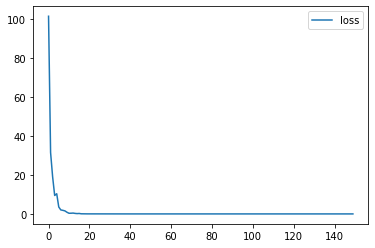

In [136]:
plt.plot(r2.history['loss'], label='loss')
#plt.plot(r2.history['val_loss'], label='val_loss')
plt.legend()

Plot the accuracies:

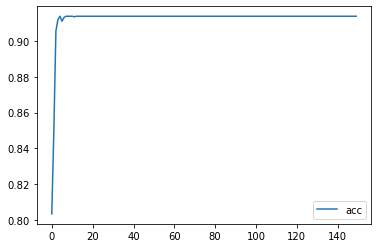

In [137]:
plt.plot(r2.history['accuracy'], label='acc')
#plt.plot(r2.history['val_accuracy'], label='val_acc')
plt.legend()

In [138]:
print(model.evaluate(X_test, y_test))

12/12 [==============================] - 0s 999us/step - loss: 0.3197 - accuracy: 0.9025
[0.3196597099304199, 0.902506947517395]


In [140]:
model.save_weights('./weights/model_systolic_diastolic_excluded/')


**Applying this dataset on different models to create benchmarks to compare with Fully Connected model:**

*Logistic Regression* **(linear classifier):**

In [103]:
from sklearn.linear_model import LogisticRegression
model =LogisticRegression()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))



0.9138251704897706
0.9025069637883009


In [105]:
for i in range(X_train[0].shape[0]):
 print("weight for the feature",i,":",model.coef_[0][i])

model.coef_[0].sort()

print("sorted list, positive weights contribute MORE TO DETERMINE potential hypertension case and negative features conribute more to make prediction as NOT hypertension. So we can say 0 valued weights do not contribute to anything:",model.coef_[0])

weight for the feature 0 : -0.002204197745180158
weight for the feature 1 : -0.0020580556545120496
weight for the feature 2 : -0.0018476029920989035
weight for the feature 3 : -0.0017392015573981473
weight for the feature 4 : -0.001309569884951161
weight for the feature 5 : -0.0012986945766602534
weight for the feature 6 : -0.0012558997868359195
weight for the feature 7 : -0.001044450183718869
weight for the feature 8 : -0.0010411694398086097
weight for the feature 9 : -0.001003031407691053
weight for the feature 10 : -0.0009978758145447076
weight for the feature 11 : -0.0008635668161326685
weight for the feature 12 : -0.0008060209811952334
weight for the feature 13 : -0.0007723014259508736
weight for the feature 14 : -0.00043181865850317993
weight for the feature 15 : -0.00036305971840124495
weight for the feature 16 : -0.00034605420873229067
weight for the feature 17 : -0.0003215899842853878
weight for the feature 18 : -0.00029768026994142743
weight for the feature 19 : -0.0002150325

*Decision Tree*  

In [107]:
from sklearn.tree import DecisionTreeClassifier
model =DecisionTreeClassifier()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

1.0
1.0


*AdaBoost*

In [108]:
from sklearn.ensemble import AdaBoostClassifier
model =AdaBoostClassifier()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test,y_test))

1.0
1.0


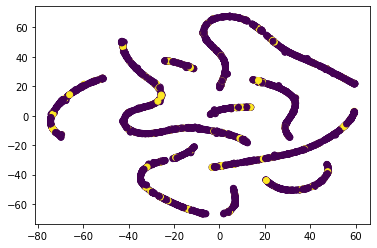

In [127]:
# Visualize the data (tsne is great but slow.)

from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
transformed = tsne.fit_transform(X_train)

#visualize in the 2d
plt.scatter(transformed[:,0], transformed[:,1], c=y_train) #take first two columns in order to get 2d plot.
plt.show()

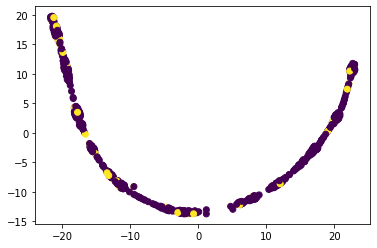

In [131]:
transformed = tsne.fit_transform(X_test)

# visualize the clouds in 2-D
plt.scatter(transformed[:,0], transformed[:,1], c=y_test) #take first two columns in order to get 2d plot.
plt.show()